In [1]:
# import dependencies
import os
import numpy as np
import pandas as pd
import json
import cv2
import matplotlib.pyplot as plt

# set path to data

In [2]:
# set paths to dataset
data_path = os.path.join(os.getcwd(), 'dataset')

# path to train & test folders
train_path = os.path.join(data_path, 'warm-up-train')
test_path = os.path.join(data_path, 'warm-up-test')

# path to image folders
train_image_path = os.path.join(train_path, 'train')
test_image_path = os.path.join(test_path, 'test')

# path to transcription folders
train_text_path = os.path.join(train_path, 'train_transcriptions.json')
test_text_path = os.path.join(test_path, 'test_transcriptions.json')

# set annotation path
train_label_path = os.path.join(train_path, 'train_emotion_labels.csv')

# import data

In [3]:
# read train set

# read label file
train_labels = pd.read_csv(train_label_path)

# read transcript
with open(train_text_path) as file:
    train_transcripts = json.load(file)
    
# number of image
train_images = os.listdir(train_image_path)
print("Number of training images", len(train_images))

Number of training images 800


In [4]:
# reat test set
# read transcript
with open(test_text_path) as file:
    test_transcripts = json.load(file)

# number of image
test_images = os.listdir(test_image_path)
print("Number of testing image", len(test_images))

Number of testing image 100


# inspect data

## train set

In [5]:
train_labels.head(5)

,1,0_35_4,0,0.1,1.1,1.2,1.3,0.2,0.3,0.4
0,2,1008_4_3,1,0,0,0,0,1,0,0
1,3,1016_29_1,0,0,0,0,0,0,1,0
2,4,1030_6_1,1,0,1,0,0,0,1,0
3,5,1037_8_4,1,1,0,0,0,0,1,0
4,6,1038_37_8,0,1,0,0,0,1,1,0


In [6]:
# reename columns
# 8 emotion classes including: 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral, 7=Others.
emotions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral', 'others']
train_labels = train_labels.rename(
    columns = {old:new for old, new in zip(
        train_labels.columns, ['id', 'image_id', 'angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral', 'others'])})

In [7]:
# statistics details
train_labels.describe()

,id,angry,disgust,fear,happy,sad,surprise,neutral,others
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.0
mean,401.000000,0.367960,0.229036,0.364205,0.310388,0.183980,0.370463,0.639549,0.0
std,230.795725,0.482552,0.420476,0.481508,0.462942,0.387711,0.483231,0.480432,0.0
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,201.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,401.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
75%,600.500000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.0
max,800.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [8]:
train_transcripts[:5]

[{'dialog': ['im afraid they re gone for good !',
   " dont give up so ne ) easily , sir ! you ' ve d ! got woozy winks , one man bureau of missing persons at your service !"],
  'narration': [],
  'img_id': '0_35_4'},
 {'dialog': ['oooh !', " thisill teach you not to go snoopin ' around , pal "],
  'narration': [],
  'img_id': '1008_4_3'},
 {'dialog': [' this is a good idea , don by the time the fire reaches the powder kegs well be able to get a safe distance from the ship .'],
  'narration': [],
  'img_id': '1016_29_1'},
 {'dialog': [' sorry , gents but nobody touches this mask !'],
  'narration': [],
  'img_id': '1030_6_1'},
 {'dialog': ['173 owlya rash powder spread over the city scared 7hem linto selling real estate agent buy 17 fopme . this entire town stands on a huge copper mine which wanted'],
  'narration': [],
  'img_id': '1037_8_4'}]

   id  image_id  angry  disgust  fear  happy  sad  surprise  neutral  others
0   2  1008_4_3      1        0     0      0    0         1        0       0
['oooh !', " thisill teach you not to go snoopin ' around , pal "]


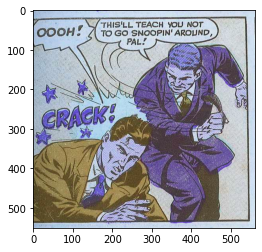

In [9]:
# read sample
sample = train_transcripts[1]
print(train_labels[train_labels['image_id'] == sample['img_id']])

# print transcript
print(sample['dialog'])

# show image
image_path = os.path.join(train_image_path, sample['img_id'] + '.jpg')
image = cv2.imread(image_path)
plt.imshow(image)

   id   image_id  angry  disgust  fear  happy  sad  surprise  neutral  others
1   3  1016_29_1      0        0     0      0    0         0        1       0
[' this is a good idea , don by the time the fire reaches the powder kegs well be able to get a safe distance from the ship .']


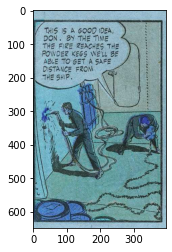

In [10]:
# read sample
sample = train_transcripts[2]
print(train_labels[train_labels['image_id'] == sample['img_id']])

# print transcript
print(sample['dialog'])

# show image
image_path = os.path.join(train_image_path, sample['img_id'] + '.jpg')
image = cv2.imread(image_path)
plt.imshow(image)

    id  image_id  angry  disgust  fear  happy  sad  surprise  neutral  others
14  16  1080_6_5      0        0     1      0    0         1        1       0
["hurry kola before ol ' stringo hears you"]


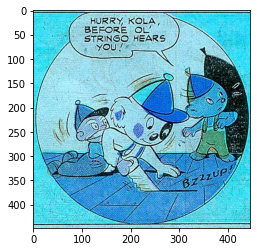

In [11]:
# read sample
sample = train_transcripts[15]
print(train_labels[train_labels['image_id'] == sample['img_id']])

# print transcript
print(sample['dialog'])

# show image
image_path = os.path.join(train_image_path, sample['img_id'] + '.jpg')
image = cv2.imread(image_path)
plt.imshow(image)

## inspect test set

In [12]:
test_transcripts[:5]

[{'dialog': [' the chief mentioned that the place was deserted , but that doesnt seem to be the case !',
   'maybe she thinks its a hotel or something !'],
  'narration': [],
  'img_id': '0_19_3'},
 {'dialog': ['disappoint you but id probably give you'],
  'narration': [],
  'img_id': '0_21_4'},
 {'dialog': ['that s what t was going to ask you wh where did 2 you get this wh who are you 2',
   ' billions is the name k joshua t , billions ! this fs just part of a treasure i buried on amos sland back in my seafaring days !'],
  'narration': [],
  'img_id': '0_27_5'},
 {'dialog': ['ah i feel better already now for a brisk walk to calm my jangled nerves !'],
  'narration': [],
  'img_id': '0_3_4'},
 {'dialog': ['poor girl ! no wonder shes shy and retiring !'],
  'narration': [],
  'img_id': '0_35_3'}]

In [13]:
image_id = test_transcripts[0]['img_id']
print(image_id in test_images)

False


## inspect emotions

In [14]:
emotion_count = train_labels[['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral', 'others']].sum()
emotion_count

angry       294
disgust     183
fear        291
happy       248
sad         147
surprise    296
neutral     511
others        0
dtype: int64

## inspect text token length

In [15]:
from collections import Counter

In [16]:
# train set
train_length = []
for transcript in train_transcripts:
    for text in transcript['dialog']:
        try:
            tokens = text.split(' ')
        except:
            tokens = []
        train_length.append(len(tokens))
        
# test set
test_length = []
for transcript in test_transcripts:
    for text in transcript['dialog']:
        try:
            tokens = text.split(' ')
        except:
            tokens = []
        test_length.append(len(tokens))

In [17]:
# compute occurence
train_freq = Counter(train_length)
test_freq = Counter(test_length)

print("Train occurence", train_freq)

Train occurence Counter({2: 93, 4: 81, 3: 75, 8: 67, 9: 66, 5: 65, 11: 59, 10: 56, 6: 55, 7: 54, 13: 47, 12: 44, 1: 42, 15: 40, 0: 34, 14: 30, 18: 29, 16: 25, 19: 22, 17: 21, 21: 21, 22: 20, 30: 19, 20: 19, 26: 14, 27: 14, 25: 12, 23: 11, 28: 10, 34: 9, 24: 9, 31: 8, 29: 7, 36: 3, 33: 3, 38: 3, 40: 2, 48: 2, 35: 2, 32: 2, 60: 1, 37: 1, 41: 1, 55: 1, 151: 1, 39: 1, 154: 1, 45: 1})


Text(0.5, 1.0, 'Token-length distribution in Training set')

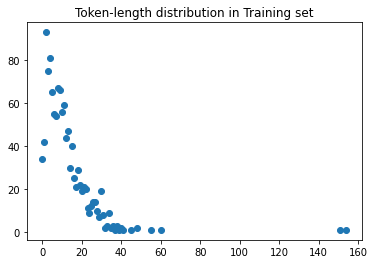

In [18]:
plt.scatter(x = train_freq.keys(), y = train_freq.values())
plt.title('Token-length distribution in Training set')

Text(0.5, 1.0, 'Token-length distribution in Testing set')

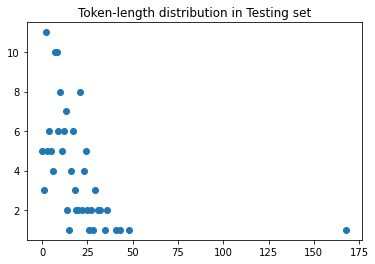

In [19]:
plt.scatter(x = test_freq.keys(), y = test_freq.values())
plt.title('Token-length distribution in Testing set')

## inspect image width & height

In [25]:
# collect widths and heights
widths, heights = [], []
for path in train_images:
    path = os.path.join(train_image_path, path)
    w, h, _ = cv2.imread(path).shape
    widths.append(w)
    heights.append(h)

Text(0.5, 1.0, 'Distribution of width and height')

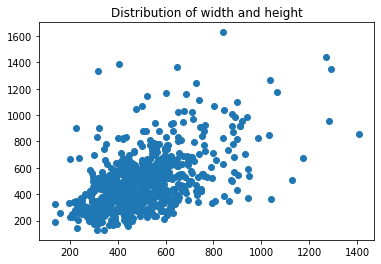

In [26]:
# print distribution of widths and heights
plt.scatter(x = widths, y = heights)
plt.title('Distribution of width and height')

Text(0.5, 1.0, 'Distribution of heights')

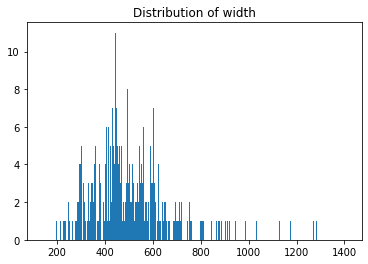

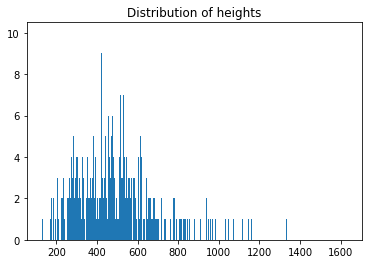

In [38]:
# print distribution of widths and heights
plt.figure()
plt.hist(widths, bins = len(widths))
plt.title('Distribution of width')

plt.figure()
plt.hist(heights, bins = len(heights))
plt.title('Distribution of heights')

Image with smallest width 557


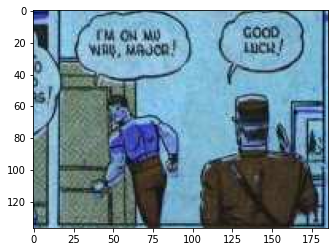

In [31]:
# print smallest image
print("Image with smallest width", widths.index(min(widths)))
image_path = os.path.join(train_image_path, train_images[557])
image = cv2.imread(image_path)
plt.imshow(image)

Image with largest width 71


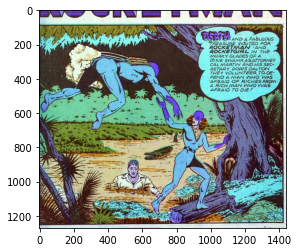

In [45]:
# print largest image
print("Image with largest width", heights.index(sorted(heights, reverse = True)[1]))
image_path = os.path.join(train_image_path, train_images[71])
image = cv2.imread(image_path)
plt.imshow(image)